In [71]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy import integrate
plt.style.use("seaborn-whitegrid")
%matplotlib ipympl


In [78]:
#### integral to be evaluated   1/sqrt(2 pi)   int(x.e^-x**2) 
           #### a probability distribution has to have the integral as 1
Num=100000
def Norm(x, y,z):
    return x*y*z*np.exp(x+y+z)
                         ##  Limits  for normalising
def bounds_x(x):         ### NOTE: these bounds  can have variables not in use right now.
    return [0,1]        

def bounds_y(x):     
    return [0,1]
def bounds_z(x):
    return [0,1]

Int_temp,Error=integrate.nquad(Norm, [bounds_x(1), bounds_y(1),bounds_z(1)]) 
Normalise=1/Int_temp


def p(x,y,z):
    if (x>=0 and x<=1) and (y>=0 and y<=1) and (z>=0 and z<=1):
        return Normalise*x*y*z*np.exp(x+y+z) # seperate a region of the integral. Usually we use normal dist:
    else:                        ## but it has disadvantages to we sample different dist from the integral                                               
        return 0            ####  for some reason it doesnt work if i dont do this
    
def f(x,y,z):              
    return x*y*z*np.exp(x+y+z)/Normalise    ### Function to be integrated/Prob Distribution
    

def uniform_proposal(x, delta=1.0,):   ####  to get the distance moved in one step
    return np.random.uniform(x - delta, x + delta)


def metropolis_sampler(p, nsamples):  ## Samples the desired distribution using MCMC
    chain=[[],[],[]]
    x = [0.5,0.5,0.5] # start somewhere
    proposal=uniform_proposal
    for i in range(nsamples):
       # print(x)
        trial_x = proposal(x[0]) # random neighbour from the proposal distribution
        trial_y = proposal(x[1])
        trial_z = proposal(x[2])
        acceptance = p(trial_x,trial_y,trial_z)/p(x[0],x[1],x[2])
        # accept the move conditionally
        if np.random.uniform() < acceptance:
            x[0] = trial_x
            x[1] = trial_y          ### update if accept
            x[2] = trial_z
        chain[0].append(x[0])
        chain[1].append(x[1])
        chain[2].append(x[2])
    return chain
%matplotlib ipympl
samples =metropolis_sampler(p,Num)
b=np.linspace(0,1,10)
plt.hist(samples)
plt.title('distribution were using')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'distribution were using')

In [73]:
def Evaluate_integral(samples,f):
    Funct=[]
    Funct_plot=[]
    Sum=0
    for i in range(0,len(samples[0])):
        x_temp=random.randint(0,Num-1)
        y_temp=random.randint(0,Num-1)   ## chose random integers(for index) to sample from
        z_temp=random.randint(0,Num-1)
        xi=samples[0][x_temp]
        yi=samples[1][y_temp]         ### sample from given non unform distribution
        zi=samples[2][z_temp]
        Integ=f(xi,yi,zi)             ## add it to integral
        Sum+=Integ
        Temp=Sum/(i)
        Funct_plot.append(Temp)
        Funct.append(Integ)
    Integral=(np.sum(Funct)/(len(Funct)))       #### For some reason the expectation value is
    print(Integral)                                      ##   Same as the average.... check the reading
    return Funct_plot,Integral



c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


4.0630051743519475


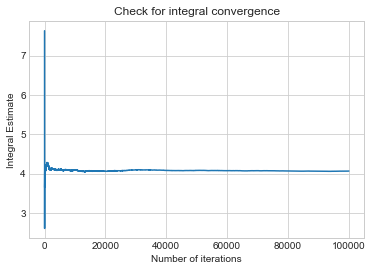

In [74]:
F_list,Integral=Evaluate_integral(samples,f)  ## Impliment function
N=[i for i in range(0,len(F_list))]
%matplotlib inline
plt.plot(N,F_list)               ## See the integral converging
plt.xlabel("Number of iterations")
plt.ylabel("Integral Estimate")
plt.title('Check for integral convergence')
plt.show()




In [77]:
Error=[]
var=0
for i in range(0,Num):   ############  Sum to find variance using the given formula
    var_temp=(F_list[i]-Integral)**2/(i)
    Error.append(var_temp)
    var+=var_temp
    
fu=[1/np.sqrt(i) for i in N ]  ## plot of 1/N
%matplotlib ipympl
plt.plot(N,Error,label='Variance')
plt.plot(N,fu,label='1/N')
plt.xlabel("Number of iterations")
plt.ylabel("Variance")
plt.title('Variance plot')
plt.xlim([-2000, 10000])
plt.ylim([-0.2, 1.5])
plt.legend()
plt.show()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [79]:
########################    Normal Distribution ##################
Sum=0
Unif=[]
def f(x,y,z):
    return ((x*y*z)**2)*np.exp(2*(x+y+z))
for i in range(len(F_list)):
    x=np.random.uniform()
    y=np.random.uniform()
    z=np.random.uniform()
    Integral=f(x,y,z)
    Sum+= Integral
    I=Sum/i
    Unif.append(I)
    
%matplotlib ipympl
plt.plot(N,Unif,color='b',label="Uniform")
plt.plot(N,F_list,color='r',label="metropolis sampling")               ## See the integral converging
plt.axhline(y =4.07502, color = 'g', linestyle = '-',label='Actual Integral')
plt.xlabel("Number of iterations")
plt.ylabel("Integral Estimate")
plt.legend()
plt.show()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …